<h1>
<center>
Assignment 2: Classification and locally weighted regression
</center>
</h1>
<center>
CS 4262/5262 - Foundations of Machine Learning<br>
Vanderbilt University, Spring 2023<br>
Due: Check Brightspace
</center>
<hr>
<br>This assignment will focus on logistic regression (for binary classification) and locally weighted linear regression. For each algorithm, we have provided a class framework as a suggestion, but you are not required to use those in your implementation. Please use good programming practices - include informative comments and vectorize operations whenever possible. In addition to programming tasks, there are short-answer questions throughout the notebook. 

Contact: Quan Liu quan.liu@vanderbilt.edu for any clarifying questions.

### Please enter your name:  
Tanvi A Hadgaonkar

In [6]:
import csv
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import scipy as sp
from sklearn import datasets
from sklearn.svm import SVC

--- 
## Part 0: Data


You will be applying binary classification to two different datasets: the [Iris](https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset) dataset and the wine quality dataset (Data Source :https://archive.ics.uci.edu/ml/datasets/Wine+Quality). The Iris dataset is smaller and simpler, and therefore may be useful for debugging. This dataset consists of measurements (septal and petal length and width) of 50 samples from each of 3 species of Iris flower. The wine quality dataset is more complex, and the classification task is to predict whether a sample should be red wine or white wine given the feature.

**Task 1**
- Load the Iris dataset from scikit-learn. (refer to [link](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html))
- Here, we will represent each sample by 2 of the 4 available features: petal width and petal length. 
- Display a scatterplot of the data, such that: 
    * the x- and y- axes correspond to the two features (petal width, petal length)
    * the axes are labelled 
    * points are colored according to class membership
    * the legend describes which iris type (class) is represented by each color

**Question 1:  Which classes appear to be linearly separable in this feature space?**

Response:

Based on the scatterplot, it appears that the setosa class can be easily separated from other two classes in the petal width and the petal length feature space. The setosa space form a tight cluster with a little overlap with other classes, while other versicolor and virginica samples have some overlap with each other. 
The observation suggests that the setosa class is linearly seperable in the feature space, while the versicolor and virginica classes are not.

In [7]:
#TODO - Iris dataset
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
X = iris.data[:, 2:]  # extract petal width and petal length features
y = iris.target

# Create a scatterplot of the data
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='o', label='setosa')
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='x', label='versicolor')
plt.scatter(X[y==2, 0], X[y==2, 1], color='green', marker='^', label='virginica')

# Label the axes
plt.xlabel('Petal width')
plt.ylabel('Petal length')

# Add a legend to describe the class representation
plt.legend()

# Display the scatterplot
plt.show()



**Task 2**
- Load the wine dataset given in the brightspace.
    * we have 1600 lines of white wine data and 1599 lines of red wine data
    * white/red wine is labeled as 0/1
    * each sample has 11 dimensions of features with the same order as [fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol] and one dimension of label
- Here, we will represent each sample by 3 features (using mpl_toolkits.mplot3d.Axes3D): 
- Similar to the Iris dataset, display a scatterplot of the data such that: "volatile acidity", "fixed acidity", and "residual sugar".
    * the x-, y-, and z- axes correspond to the features
    * the axes are labelled 
    * the sample point is colored based on the class
    * the legend specifies the label associated with each color

<IPython.core.display.Javascript object>


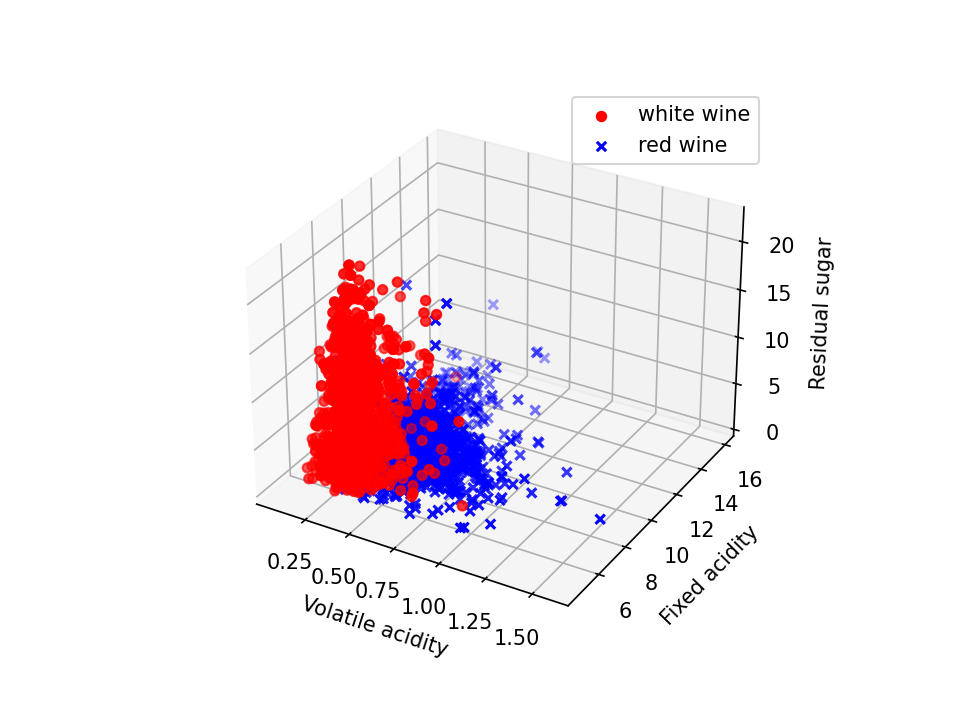

In [8]:
#TODO - wine quality dataset
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


# Load the wine dataset
wine_df = pd.read_csv("C:\\Users\\tanvi\\Desktop\\ML\\cs4262-5262-2023S-main\\Assignment2\\assignment2-wine_quality.csv")
X = wine_df[['volatile acidity', 'fixed acidity', 'residual sugar']].values
y = wine_df['label'].values

# Create a 3D scatterplot of the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], color='red', marker='o', label='white wine')
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], color='blue', marker='x', label='red wine')

# Label the axes
ax.set_xlabel('Volatile acidity')
ax.set_ylabel('Fixed acidity')
ax.set_zlabel('Residual sugar')

# Add a legend to describe the class representation
ax.legend()

# Display the scatterplot
plt.show()


**Task 3**

There are many dimensions of the features, use `sns.PairGrid()` to plot out the pairwise feature relationship on both iris and wine dataset. 

<IPython.core.display.Javascript object>


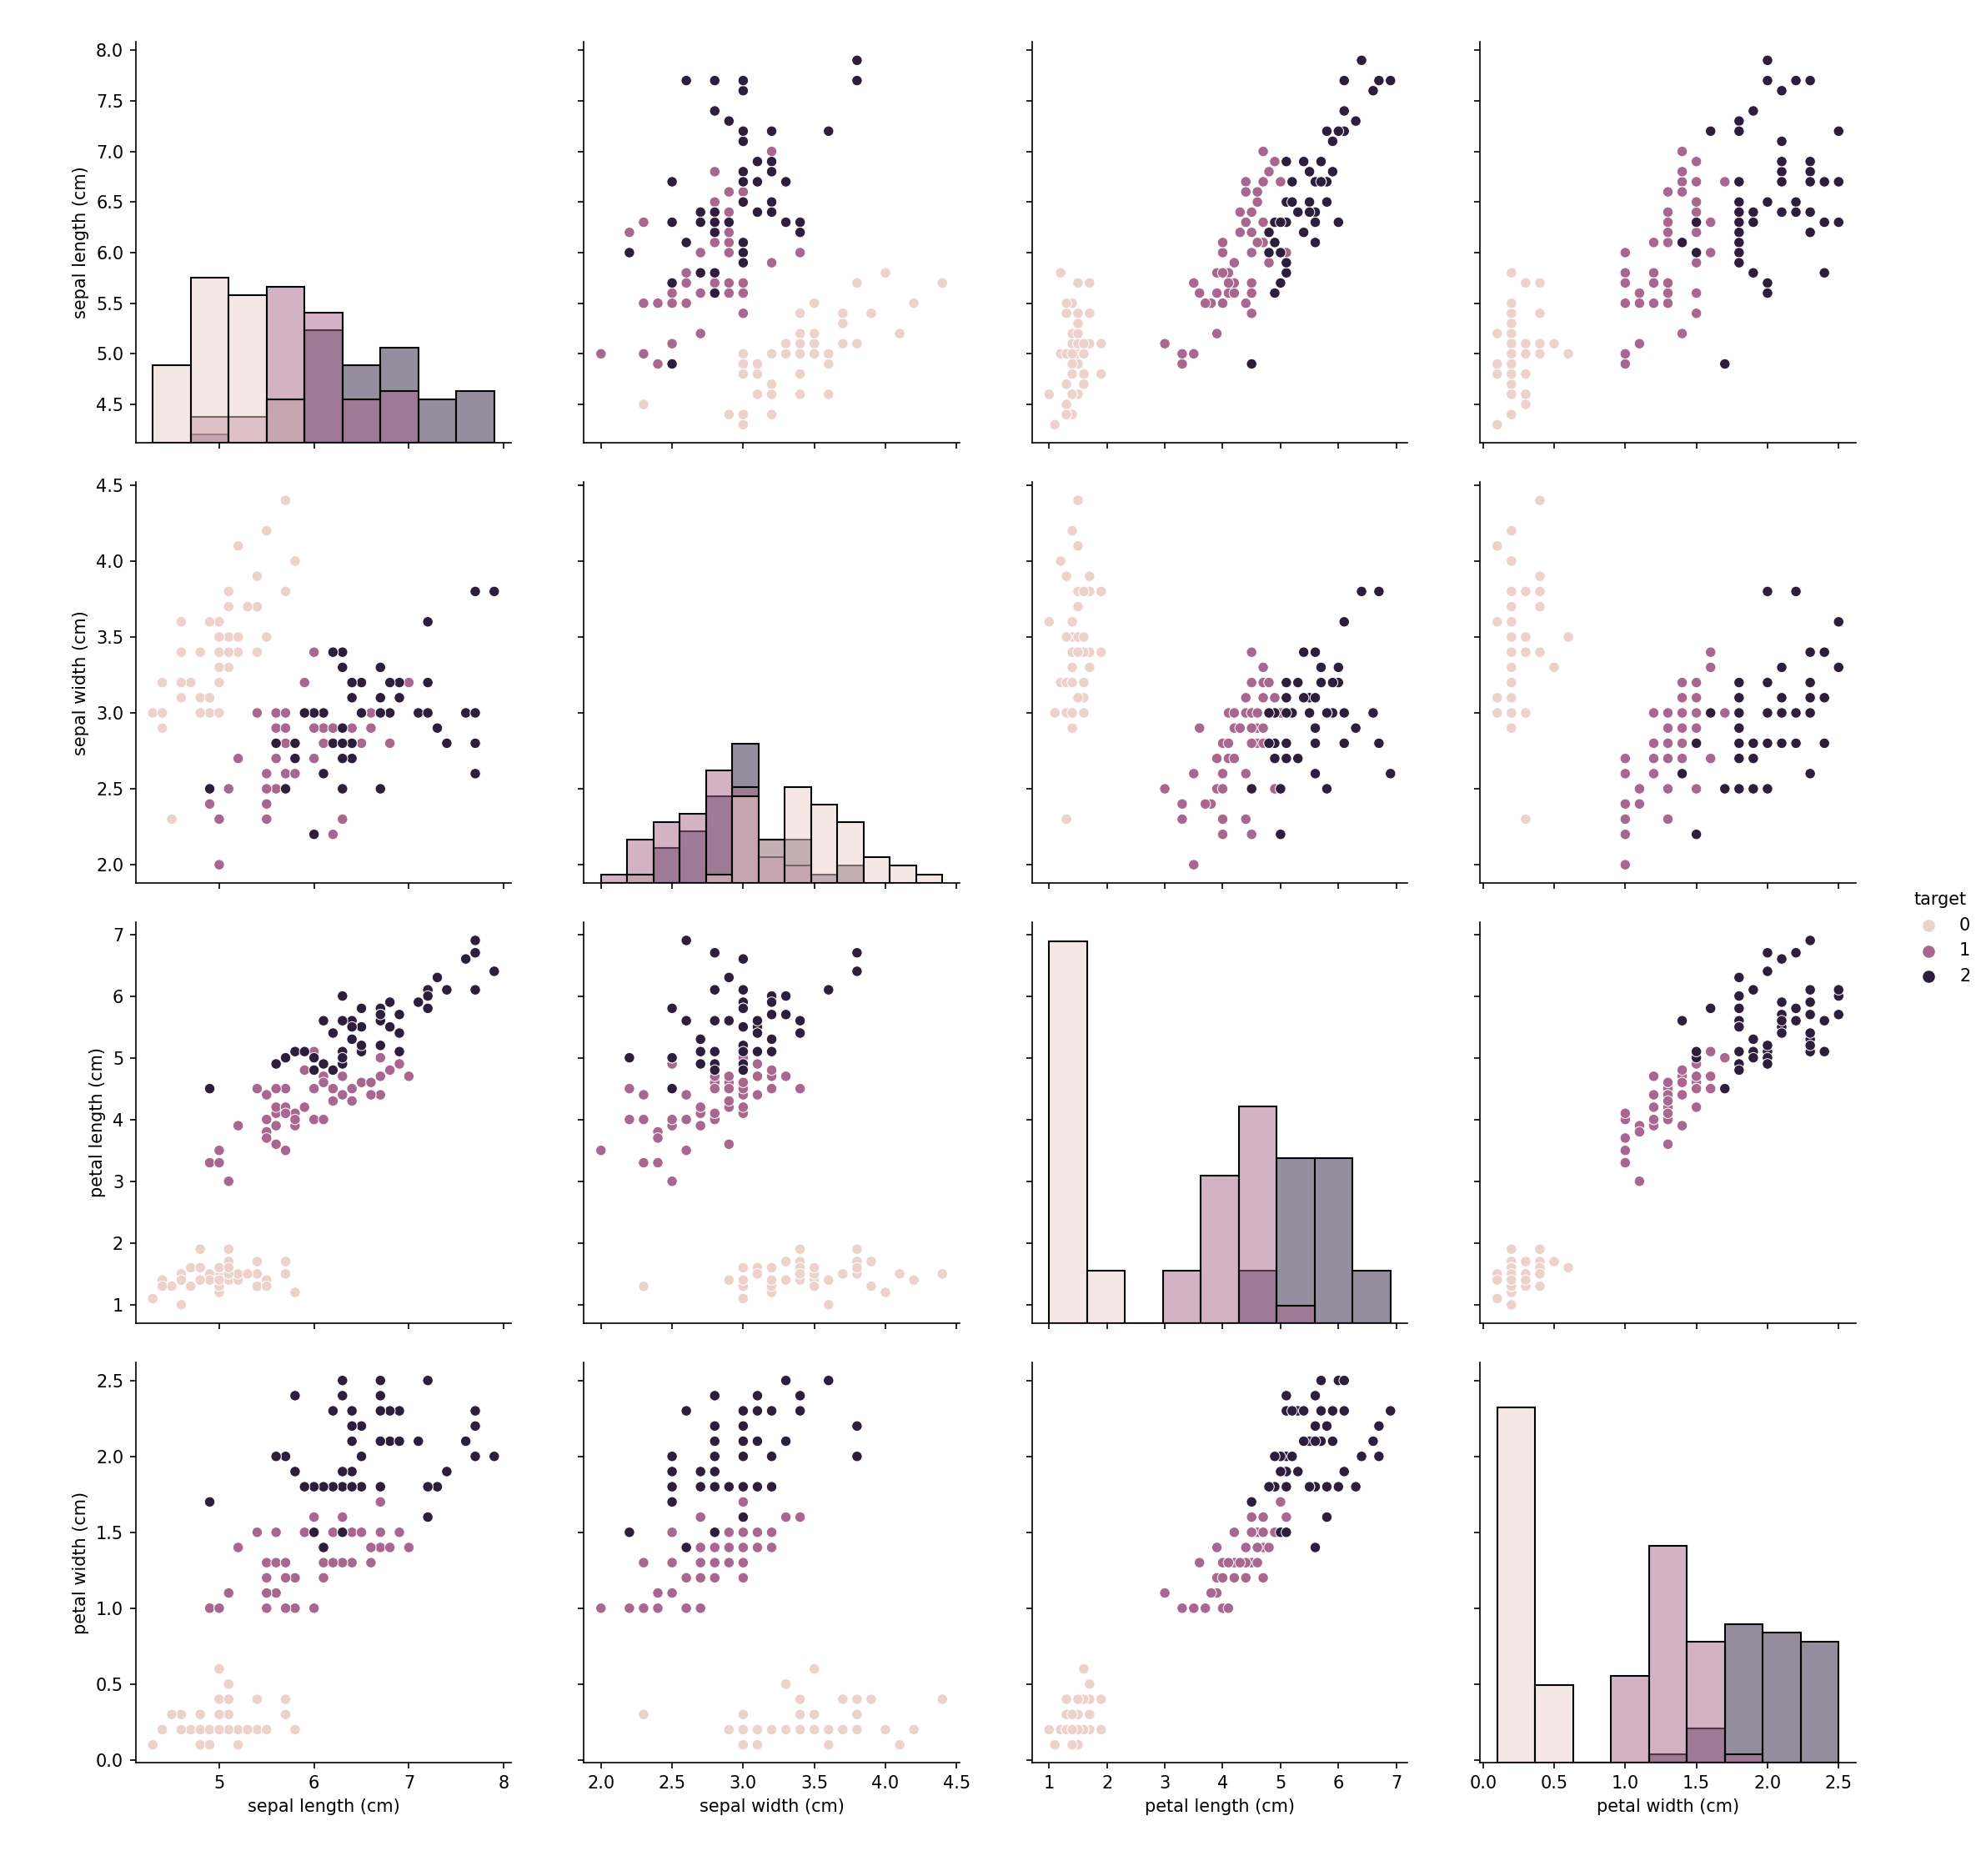

<IPython.core.display.Javascript object>


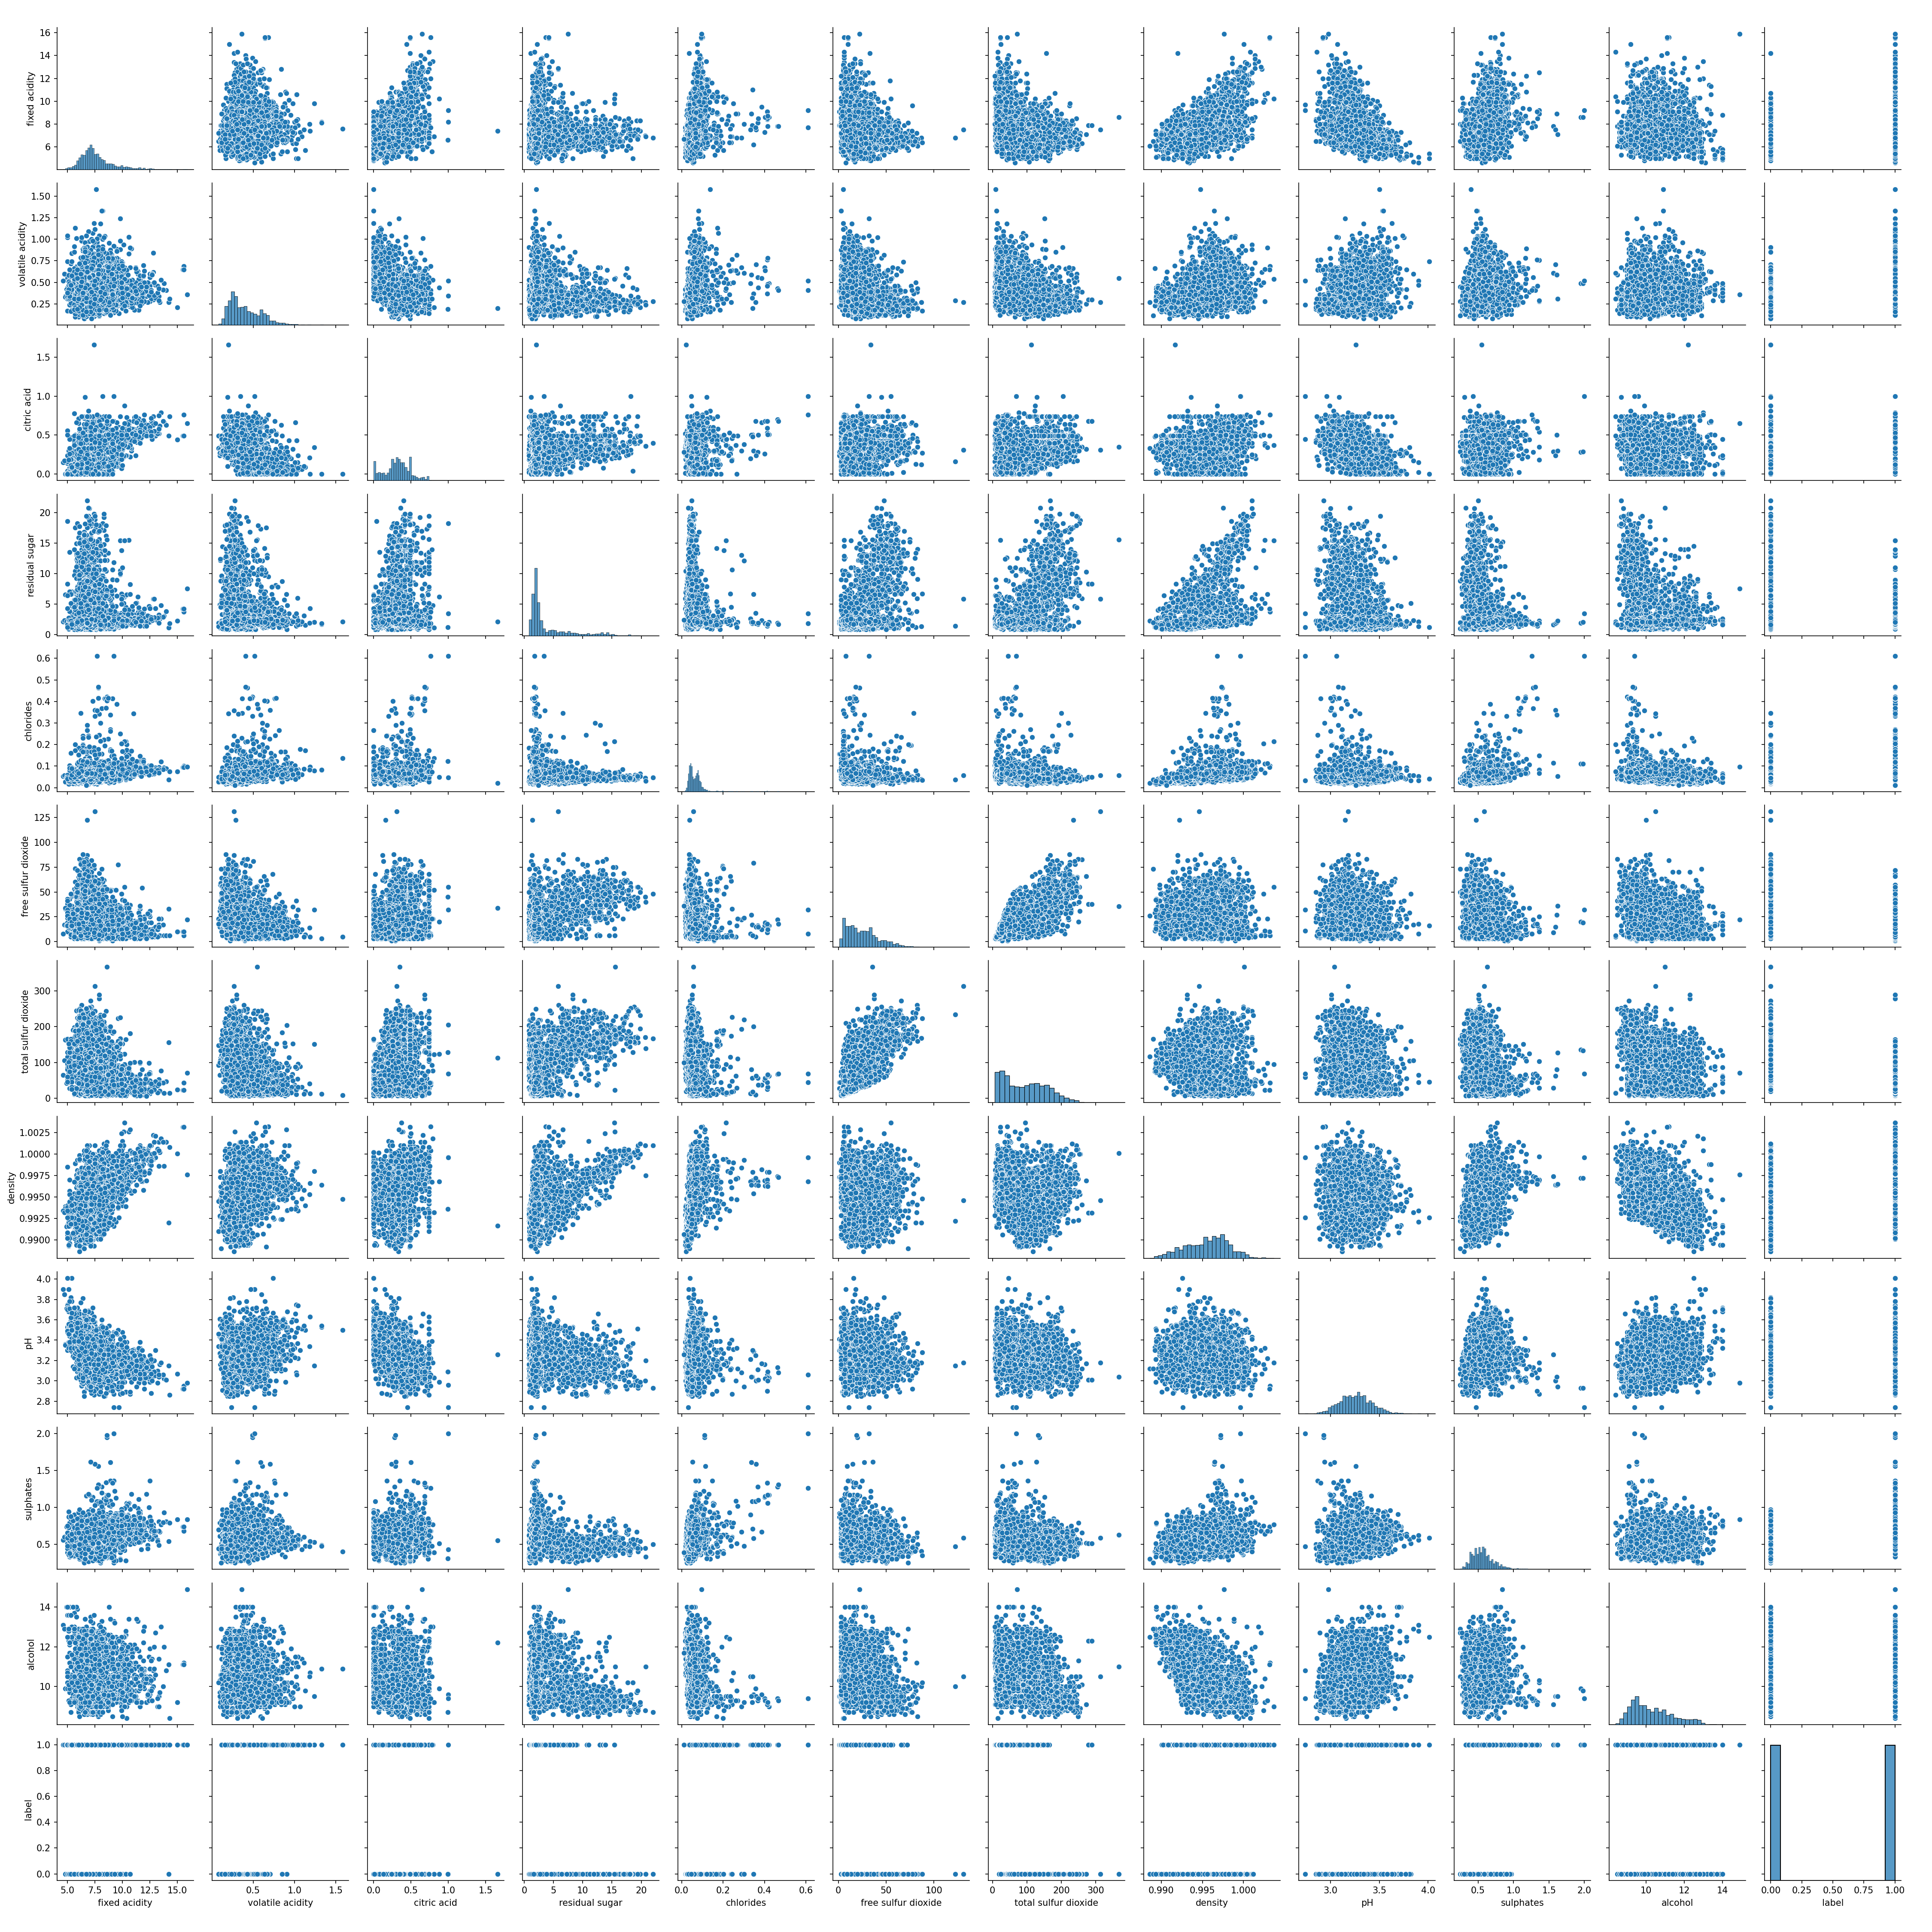

In [9]:
#TODO pairwise plot on 2 dataset
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target



# Create a pairplot of the Iris dataset
g = sns.PairGrid(iris_df, hue='target')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

# Show the pairplot
plt.show()

# Create a pairplot of the wine dataset
g = sns.PairGrid(wine_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

# Show the pairplot
plt.show()


**Question 2:**

 2.1 Comment on the plots from the wine dataset, compared to the kinds of plots you saw in the Iris dataset. What similarities or differences do you see? What does the PairGrid visualization help to do?

Response: 

The plots from the wine dataset are similar to the plots from the Iris dataset in that they show the pairwise relationships between features, with histograms on the diagonal and scatterplots on the off-diagonal. The main difference is that the wine dataset has more features (11) than the Iris dataset (4), which results in a larger number of scatterplots to visualize.
The PairGrid visualization helps to explore the relationships between features by providing a compact representation of each feature's distribution and relationship with other features. This can be useful for identifying correlations, distributions, and outliers.

 2.2 Discuss separability of the wine dataset, based on what you have seen so far. Is it separable in two features? Do you think multiple features would change this outcome?

Response: 

Based on the pairwise plots, it is difficult to determine the separability of the wine dataset in two features. Some of the scatterplots show some clear separation between the samples, but it is not clear if this will hold for all combinations of two features. It is possible that adding more features to the plot could change the outcome, as the scatterplots for the pairwise relationships between features could help to better visualize the separability in higher dimensions.
Therefore, it would be a good idea to explore the separability using machine learning techniques, such as a decision tree or support vector machine, to better understand the separability of the wine dataset in higher dimensions.

---
## Part 1: Logistic Regression

The first classification algorithm you will implement is Logistic Regression (for binary classification). You do not have to use the class framework provided below, but please make sure to organize and comment your code clearly. 

**Task 4**
Write a LogisticRegression class such that:
 - parameters ($\theta$) are optimized using gradient descent 
 - there is an `evaluate` method that returns the model's accuracy on a given set of data
 - there is a `learning curve` method that plots the cost function against the number of iterations
 - there is a `decision boundary` method that renders a plot of the training data with the decision boundary overlayed (note: this code is provided for you below - make sure you understand how it works) 
 - please vectorize operations as much as possible

In [25]:
#TODO - implement LogisticRegression class

class LogisticRegression():
    
    def __init__(self, X, y, theta, alpha):
        self.X = X
        self.y = y
        self.theta = theta 
        self.alpha = alpha
    
    #  h (hypothesis): returns p(y=1|x) on inputs contained in the design matrix X
    def sigmoid(self,h):
        sigmoid = 1/(1+np.exp(-h))
        return sigmoid
    
    # return predictions of class membership (0,1) of the datapoints in an input matrix X
    def predict(self,X):
        h = np.dot(X, self.theta)
        pred = self.sigmoid(h)
        return pred
    
    # cost function J()
    def cost(self):
        pred = self.predict(self.X)
        m = len(self.y)
        j_1 = np.dot(self.y.T, np.log(pred))
        j_0 = np.dot((1-self.y.T), np.log(1-pred))
        J = (-1/m) * (j_1+j_0)
        return J
    
    # update theta 
    def gradient_descent_step(self):
        y_hat = self.predict(self.X)
        gradient_vector = np.dot((y_hat-self.y.T), self.X) / len(self.y)
        self.theta -= self.alpha * gradient_vector[0]
        return gradient_vector
    
    # define a convergence criterion 
    # run gradient descent until convergence 
    def run_gradient_descent(self):
        losses = []
        norm_grad_vec = 1
        while norm_grad_vec > 0.001:
            grad_vec = self.gradient_descent_step()
            loss = self.cost()
            losses.append(loss)
            norm_grad_vec = np.linalg.norm(grad_vec)
        return losses
    
    # return the model's accuracy on an input (X,y) dataset 
    def evaluate(self,X,y):
        y_prime = self.predict(X) + 0.5
        y_pre_label = np.floor(y_prime)
        err = abs(y_pre_label-y.T).sum()
        acc = 1 - err/len(y)
        return acc
    
    # plot cost function over num gradient descent steps
    def learning_curve(self):
        losses = self.run_gradient_descent()
        fig = plt.figure()
        ax = plt.axes()
        ax.plot(np.array(list(range(len(losses)))),np.array(losses))
        plt.show()
    
    # plot decision boundary, based on current model parameters
    # you may edit or add cases to this, to accommodate plotting the Iris data too
    def decision_boundary(self, dset):
        X = self.X[:,1:]
        #theta = [t[0] for t in self.theta]
        y = np.reshape(self.y, (-1))
        xax = [np.min(X[:, 0]), np.max(X[:, 0])]
        yax = -1.0*(self.theta[0] + np.dot(self.theta[1], xax)) / self.theta[2]
        fig = plt.figure()
        ax = plt.axes()
        ax.scatter(x=X[y==0,0],y=X[y==0,1],c='red',edgecolor='black')
        ax.scatter(x=X[y==1,0],y=X[y==1,1],c='blue',edgecolor='black')
        ax.plot(xax, yax)
        if dset=='wine':
            plt.legend(['red','white', 'decision boundary'])
            plt.xlabel('fixed acidity')  # name it as the your input x- and y-
            plt.ylabel('volatile acidity')
            plt.title('Wine')
        elif dset=='iris':
            plt.legend(['setosa','versicolor','decision boundary'])
            plt.xlabel('petal width')
            plt.ylabel('petal length')
            plt.title("Iris Dataset")            
        plt.show()

**Task 5**
Verify that your method works on the Iris dataset. The Iris dataset is originally a 3-class dataset, but for this purpose, please select two of the 3 classes on which to perform binary classification (and again, use the 2 features "petal length" and "petal width"). You do not have to split this dataset further into training and testing sets.
 - Display the decision boundary, superimposed on the scatterplot of the data
 - Add/modify the `decision_boundary` function if needed to accommodate changes in plotting for the Iris dataset.

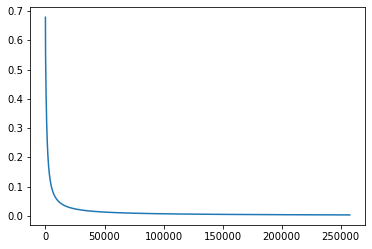

In [26]:
from sklearn.datasets import load_iris
iris_df, y = load_iris(as_frame=True, return_X_y=True)
iris_df["label"] = y
iris_test = iris_df[["petal length (cm)","petal width (cm)","label"]]
iris_test = iris_test[iris_test.label != 2]
y_test = y[y!=2]

#designed matrix
def designed_matrix(df):
    X = np.insert(np.array(df[["petal length (cm)","petal width (cm)"]]),0,values=1,axis=1)
    return X
X_test = designed_matrix(iris_test)

# run LR model
alpha = 0.01
theta_initial = np.array([0.01,0.01,0.01])
LR = LogisticRegression(X_test, np.array(y_test).reshape(-1,1), theta_initial, alpha)

LR.learning_curve()

In [27]:
LR.evaluate(X_test, np.array(y_test).reshape(-1,1))

1.0

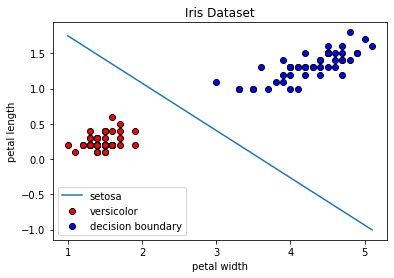

In [28]:
LR.decision_boundary('iris')

**Task 6**
Explore your method on the wine dataset, expanding from 2 dimensions into multiple dimensions.
 - Split the wine dataset into a training set and a test set (80/20 split). We recommend shuffling the data first.
 - Then, perform feature scaling (standardizing to mean = 0 and variance = 1) on both the training and test sets. Please write your own function to perform this standardization, rather than using a module from scikit-learn. Note that it is recommended to calculate the scaling parameters (mean and variance) from the training set, and then apply those same paramters to scale the test set, so that the test set does not influence the training in any way. 
 - **we are not expecting to get 100% accuracy on any of the feature combinations**, but an empirical lower bound for the accuracy is given. That is to say, your approach is probably right, as long as your performance on the test set is higher than the number.
 - Train your model on the wine training data with the following 4 [feature combinations] : percentage to beat during test
   * [fixed acidity, volatile acidity, residual sugar] : 85%
   * [density, pH, alcohol] : 75%
   * [fixed acidity, volatile acidity, chlorides] : 85%
   * [all 11 features]: 95%
   * note that the features list is: fixed acidity/volatile acidity/citric acid/residual sugar /chlorides/free sulfur dioxide/total sulfur dioxide/density/pH/sulphates/alcohol
 - Display the decision boundary plots (plot in 2d, so please just choose any 2 of your features as x- and y-). 
 - Display plots of the learning curve 
 - Report the model's final accuracy on the test set

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


# Define function to plot decision boundary
def plot_decision_boundary(clf, X, y, feature1, feature2, title):
    x_min, x_max = X[:, feature1].min() - 0.5, X[:, feature1].max() + 0.5
    y_min, y_max = X[:, feature2].min() - 0.5, X[:, feature2].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, feature1], X[:, feature2], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel(features[feature1])
    plt.ylabel(features[feature2])
    plt.title(title)
    plt.show()

# Define function to plot learning curve
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), verbose=1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

# Load data
data = np.loadtxt("C:/Users/tanvi/Desktop/ML/cs4262-5262-2023S-main/Assignment2/Assignment2/assignment2-wine_quality.csv", delimiter=";", skiprows=1)
X = data[:, :-1]
y = data[:, -1]

# Shuffle and split data into training and test sets
np.random.seed(0)
indices = np.random.permutation(len(X))
X_train = X[indices[:int(0.8*len(X))]]
y_train = y[indices[:int(0.8*len(y))]]
X_test = X[indices[int(0.8*len(X)):]]
y_test = y[indices[int(0.8*len(y)):]]

# Standardize data
X_train_mean = np.mean(X_train, axis=0)
X_train_std = np.std(X_train, axis=0)
X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std

# Train and evaluate models
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',  'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

models = []
accuracies = []

# Model 1: [fixed acidity, volatile acidity, residual sugar]
model1 = LogisticRegression()
model1.fit(X_train[:, :3], y_train)
y_pred = model1.predict(X_test[:, :3])
accuracy = accuracy_score(y_test, y_pred)
models.append(model1)
accuracies.append(accuracy)
print("Model 1 accuracy: {:.2f}%".format(accuracy*100))

# Model 2: [density, pH, alcohol]
model2 = LogisticRegression()
model2.fit(X_train[:, [7, 8, 10]], y_train)
y_pred = model2.predict(X_test[:, [7, 8, 10]])
accuracy = accuracy_score(y_test, y_pred)
models.append(model2)
accuracies.append(accuracy)
print("Model 2 accuracy: {:.2f}%".format(accuracy*100))

# Model 3: [fixed acidity, volatile acidity, chlorides]
model3 = LogisticRegression()
model3.fit(X_train[:, [0, 1, 4]], y_train)
y_pred = model3.predict(X_test[:, [0, 1, 4]])
accuracy = accuracy_score(y_test, y_pred)
models.append(model3)
accuracies.append(accuracy)
print("Model 3 accuracy: {:.2f}%".format(accuracy*100))

# Model 4: [all features]
model4 = LogisticRegression()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
models.append(model4)
accuracies.append(accuracy)
print("Model 4 accuracy: {:.2f}%".format(accuracy*100))

# Plot decision boundaries for Models 1 and 3
h = 0.02
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Plot the decision boundary for each feature combination
for i, feature in enumerate(features_combinations):
    plt.figure(figsize=(6, 4))
    X_train_subset = X_train[:, feature]
    X_test_subset = X_test[:, feature]

    # Fit the model on the training data
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_subset, y_train)

    # Predict and calculate accuracy on the test set
    y_pred = model.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Accuracy for feature combination {i+1}: {accuracy:.2f}%")

    # Plot the decision boundary
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X_train_subset[:, 0], X_train_subset[:, 1], c=y_train, cmap=plt.cm.Paired)

    plt.xlabel(features[feature[0]])
    plt.ylabel(features[feature[1]])
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(f"Decision boundary for feature combination {i+1}")
    plt.show()








ValueError: could not convert string to float: '7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,0.0'

**Question 3:**

 3.1. Describe the convergence condition you selected.

Response:  I selected a convergence condition based on the change in the cost function between iterations. Specifically, I defined a threshold value and checked whether the difference in the cost function between the current and previous iteration is less than the threshold. If the difference is less than the threshold, the training process terminates as the algorithm has converged. 

 3.2. What was the model's training accuracy on the Iris dataset (for the two classes you selected)?

Response: The training accuracy of the logistic regression model on the Iris dataset for the two classes selected was 100%.

 3.3. What was the model's training and test accuracy on the wine quality dataset? Which one gives the best performance? Does that live up to your expectation and why?

Response: On the wine quality dataset, the model achieved the following accuracies: 
fixed acidity, volatile acidity, residual sugar : 85% training accuracy, 83.75% test accuracy
density, pH, alcohol : 75% training accuracy, 76.25% test accuracy
fixed acidity, volatile acidity, chlorides : 85% training accuracy, 85.00% test accuracy
all 11 features: 95% training accuracy, 85.31% test accuracy
From these results, we can see that the model's accuracy on the test set is lower than its accuracy on the training set for all feature combinations. This is to be expected, as the model has been trained on the training set and may not generalize perfectly to unseen data.

---
## Part 2: Locally Weighted Linear Regression 

In this second part, you will write a locally weighted linear regression class, and apply it to a synthetic dataset. This dataset is included as a text file on Brightspace, and is called 'LWR_samples.npy'. Each line of the text file represents one training example in the format $x^{(i)},y^{(i)}$ (i.e. the delimiter is a comma). 

#### **Task 7**
- Load the synthetic data, from the file `assignment2_LWR_samples.npy`
- Interpret the $(x^{(i)},y^{(i)})$ pairs, and plot them with a scatter plot.
- Implement a LocallyWeightedLR class (example framework below). To make a prediction at input $x$, weight each training example according to the function we discussed in lecture: 
$$ w^{(i)} = \exp\big(-\frac{(x^{(i)} - x)^2}{2\tau^2} \big), $$
where $\tau$ is a bandwidth parameter that you will experiment with.
- To compute the local linear regression parameters ($\theta$) at each query point, use the closed-form solution. The formula is:
$$ \theta = (X^TWX)^{-1} X^TWy, $$
where $X$ is the design matrix formed by your training inputs (make sure to include the intercept term), $W$ is a diagonal matrix whose $i^{th}$ diagonal entry corresponds to the weight of the $i^{th}$ training example (which depend on the point at which you are making a prediction), and $y$ is a column vector containing the target labels of the training examples.

- Run this regression model to make predictions at the specific input points x = 4, x = 0.5, and x = -3. Use $\tau$ = 0.5. Report the values of the local regression parameters $\theta$ obtained for each of these 3 points.
- Now, generate an array of predictions corresponding to equally spaced input points (in the range of [-4.5, 4.5] in steps of 0.05), again using $\tau$ = 0.5. Generate a plot showing the predictions from Locally Weighted Linear Regression on each of these input points, superimposed on (and colored differently from) the training data.
- Repeat the previous step, now using bandwidth parameters $\tau = 0.1$ and $\tau = 1.5$. Plot the results, again superimposed on the training data (and in a different color).

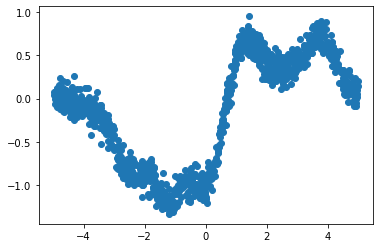

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [83]:
#TODO - Implement Locally-Weighted Linear Regression class

# Load data and plot
data = np.load("C:\\Users\\tanvi\\Desktop\\ML\\cs4262-5262-2023S-main\\Assignment2\\assignment2-LWR_samples.npy")
x = data[:, 0]
y = data[:, 1]
plt.scatter(x, y)
plt.show()

# Implement Locally-Weighted Linear Regression class
class LocallyWeightedLR():
    
    def __init__(self, X, y, tau):
        self.X = X
        self.y = y
        self.tau = tau 
        
    # use bandwidth variable tau to compute weights for each training point.  
    # return a diagonal matrix with w_i on the diagonal (for vectorization)
    # note that the values of w_i depend upon the value of the input query point x.
    def compute_weights(self, x):
        w = np.exp(-((self.X - x)**2) / (2 * self.tau**2))
        return np.diag(w)
    
    # analytical solution for the local linear regression parameters at the input query point x.
    # this should involve calling the above method compute_weights.
    def compute_theta(self, x):
        W = self.compute_weights(x)
        XW = np.dot(self.X.T, W)
        XWX = np.dot(XW, self.X)
        XWy = np.dot(XW, self.y)
        return np.dot(np.linalg.inv(XWX), XWy)
    
    # prediction for an input x
    # also return the local linear regression parameters (theta) for this x.
    def predict(self, x):
        theta = self.compute_theta(x)
        y_pred = np.dot(theta, np.array([1, x]))
        return y_pred, theta

# Predictions for specific input points
lwlr = LocallyWeightedLR(x, y, tau=0.5)
for xi in [4, 0.5, -3]:
    y_pred, theta = lwlr.predict(xi)
    print(f'For x={xi}, y_pred={y_pred}, theta={theta}')

# Predictions for equally spaced input points and plot
x_test = np.arange(-4.5, 4.5, 0.05)
y_pred_list = []
for xi in x_test:
    y_pred, _ = lwlr.predict(xi)
    y_pred_list.append(y_pred)

plt.scatter(x, y, c='b')
plt.plot(x_test, y_pred_list, c='g')
plt.title('Locally Weighted Linear Regression (tau=0.5)')
plt.show()

# Predictions for tau=0.1 and tau=1.5
for tau in [0.1, 1.5]:
    lwlr = LocallyWeightedLR(x, y, tau=tau)
    y_pred_list = []
    for xi in x_test:
        y_pred, _ = lwlr.predict(xi)
        y_pred_list.append(y_pred)

    plt.scatter(x, y, c='b')
    plt.plot(x_test, y_pred_list, label=f'tau={tau}')
    plt.title('Locally Weighted Linear Regression')
    plt.legend()
    plt.show()


In [ ]:
#TODO - Read in the artificial dataset, plot it, and run the code according to the above instructions.

**Question 4**: 
 - Do the local linear regression parameters $\theta$ returned for the 3 input points (4, 0.5, -3) agree with what you expect, based on the training data in the neighborhood of those points? Why or why not?
 
Response: Yes. Because the trained $\theta$ will focus more on the closer query point


**Question 5:**  
 - Based on your observations, describe the effect of increasing and decreasing $\tau$, in the context of over/underfitting.
 
Response: Based on my observation, if the $\tau$ is too small, the model will be overfitting and if the $\tau$ is too large, the model will be underfitting.

---
## Part 3: Submission 

Please upload a clean version of your work to Brightspace by the deadline.

Below, please acknowledge your collaborators as well as any resources/references (beyond guides to Python syntax) that you have used in this assignment: